In [1]:
import nbimporter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

###our custom cleaning function
from functions import data_clean

###Read Data file
data_train=pd.read_csv("exercise_01_test.csv")


data_train=data_clean(data_train)
###### Creating seperate array for target variable

#### Rest of data(without target variable)
all_data=data_train

index=all_data.select_dtypes(include=["float","int"]).columns
cols=[i for i in index]

Importing Jupyter notebook from functions.ipynb


In [2]:
                '''
Training Dataset consists od 40,000 records and 101 features
                '''
data_train.shape

(10000, 100)

In [3]:
#Sample of training Dataset
data_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-23.230884,-1.809757,12.380690,-4.101199,-60.760749,-22.957453,-1.964078,-0.631029,-4.306616,-4.694198,...,-200.759241,1.474824,-8.057325,asia,3.418412,-10.364264,-18.055341,-6.236096,-4.909211,47.679903
1,138.561415,1.107473,-19.781009,-17.584757,-76.922109,71.816830,-0.418432,1.403957,-5.367051,0.039857,...,-323.789253,5.539663,-1.958140,asia,-5.208792,-52.514599,-0.946514,-20.699992,-3.704683,-35.404859
2,-9.243047,-10.207303,-7.507803,3.152110,-14.915059,30.576213,-0.378178,2.606353,1.581679,4.802973,...,27.816461,-0.977431,10.324237,asia,7.939948,19.031967,7.961947,6.761312,-1.072949,36.075623
3,8.963713,17.580528,13.884170,-17.164185,-33.547539,19.288187,-1.219019,5.574611,-3.879657,2.693111,...,-374.983643,-2.631231,2.206816,asia,-8.234822,-14.077963,-11.476360,15.808888,6.361906,47.278303
4,27.431028,-6.232849,52.780835,-7.053903,5.679193,-29.618139,1.331833,4.425692,-4.213258,-0.398755,...,-352.113759,1.759678,-7.117473,asia,5.998549,-32.618465,-11.656808,-19.310773,-2.407052,-54.988928


In [5]:
            '''
Every feature in this dataset has some missing values except our target variable.
Values of this missing variable varies from 1 to 15 with median at 8
            
            '''

#print("max no. of missing values in target variable:",data_train["y"].isnull().sum())
print("max no. of missing values:",data_train.isnull().sum().max())
print("median no. of missing values:",data_train.isnull().sum().median())
print("min no. of missing values:",all_data.isnull().sum().min())
print("columns with missing values",len(data_train.columns[data_train.isnull().sum()!=0]))
            

max no. of missing values: 7
median no. of missing values: 2.0
min no. of missing values: 0
columns with missing values 90


In [6]:
   ''''
   Data set mainly consists of float,int and object data types
   '''
data_train.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

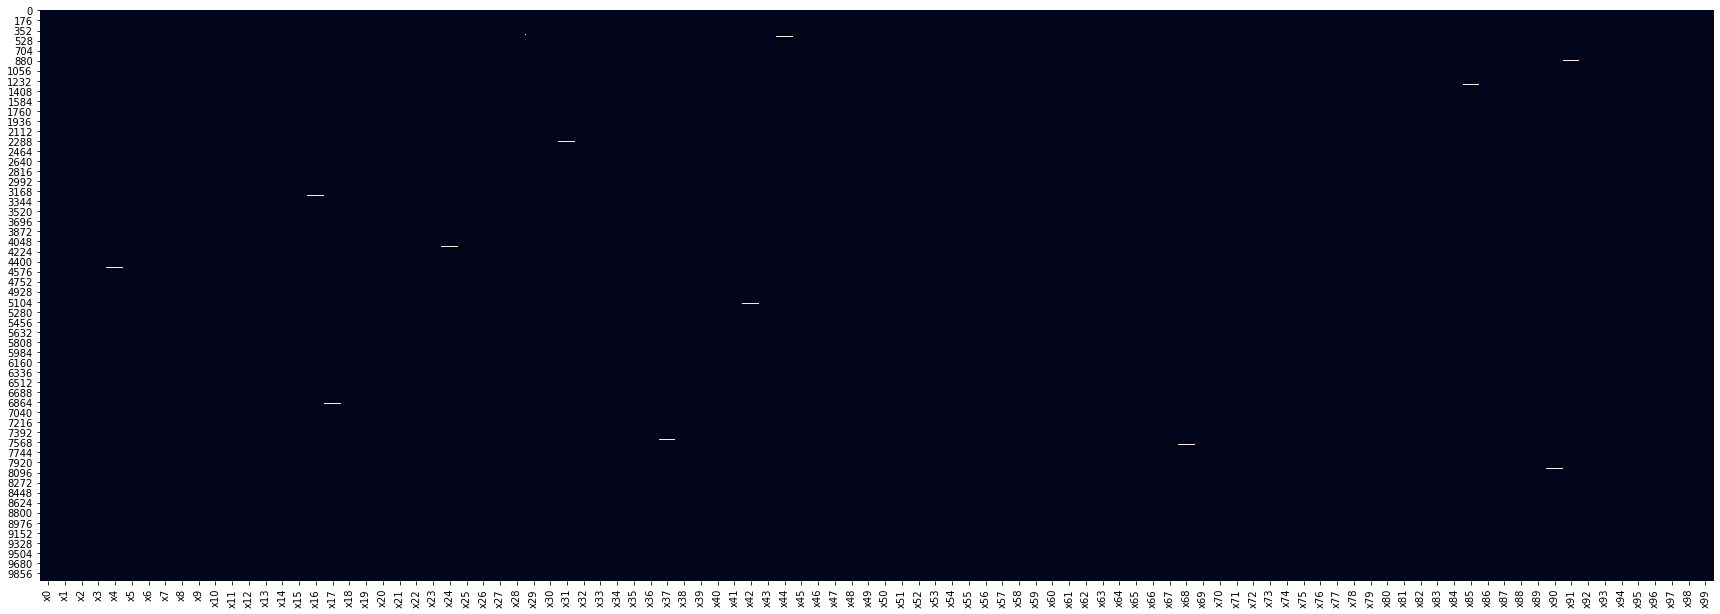

In [7]:
    '''
    The graph below is a heatmap for missing values.It generally shows the occurence of 
    missing values(Sparse or chunks).
    It also shows correlation in occurence of missing values. However for this dataset missing values 
    are sparse and correlation of missing values isnt significant.Hence median imputation strategy f
    or numeric variables
    is recommended as missing values are few and sparse.
    For categorical variables a new category called "Missing" wil be created to deal with 
    places where data isnt available 
        
    '''
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 10.5)
sns.heatmap(all_data.isnull(), cbar=False)
plt.show()

0    31953
1     8047
Name: y, dtype: int64


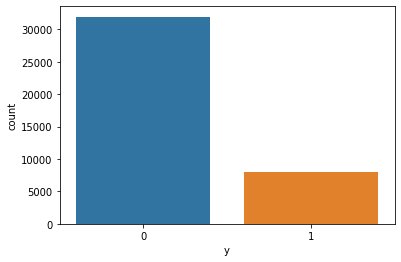

In [7]:
'''
The dataset does suffer from imbalance with about nearly 4:1 ratio for 0 to 1 labels in the training dataset
'''
print(data_train.y.value_counts())
sns.countplot(x="y",data=data_train)
plt.show()


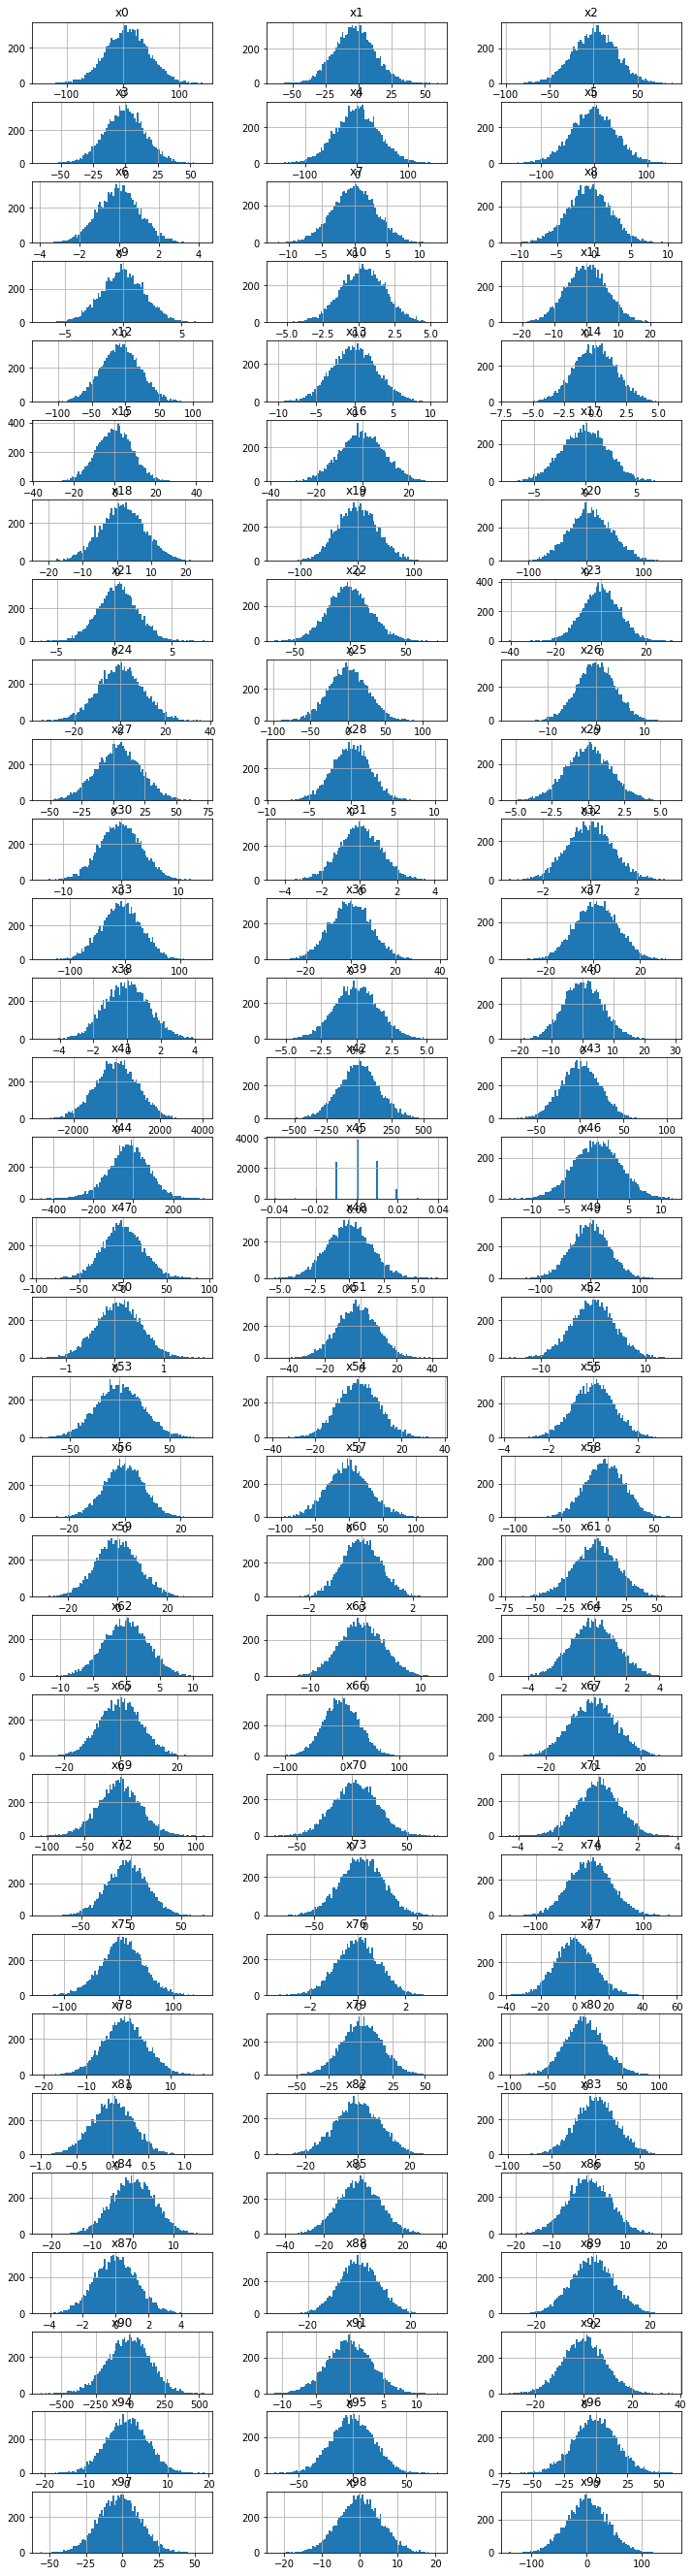

In [10]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data_train.hist(column = cols[i], bins = 100, ax=axis)
        i = i+1

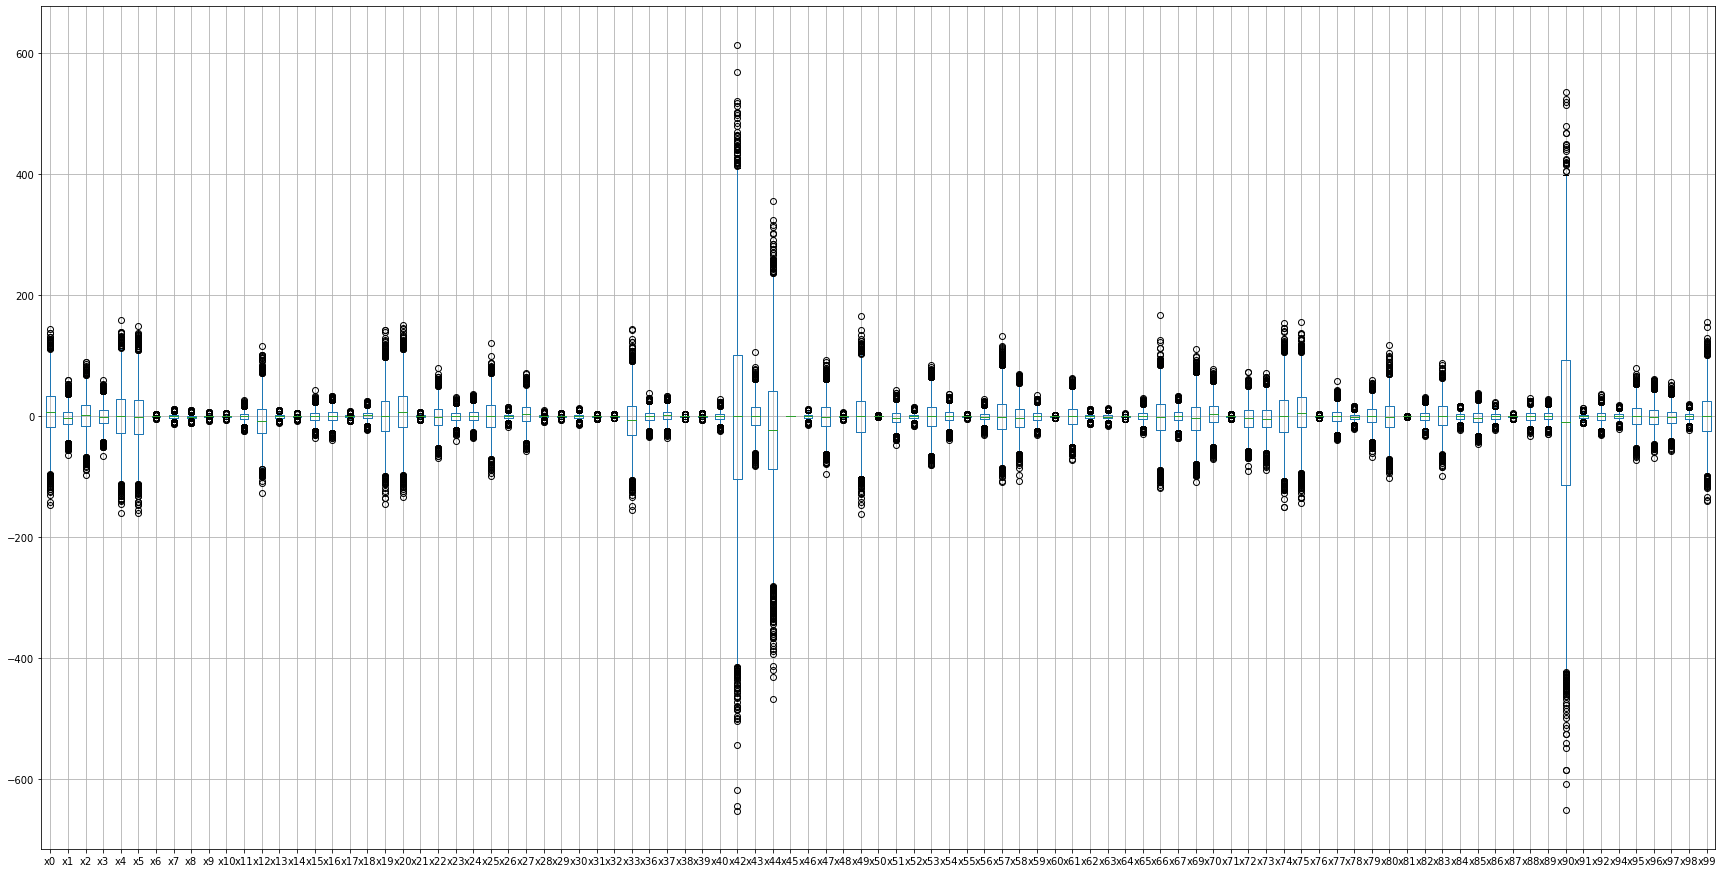

In [11]:
    ''' visualizing box plots of all features on their original scale and dropping feature x41'''
    '''All features have outliers but they seem to be uniform in all features hence may not need special treatment'''


import matplotlib
all_data.drop(columns=["x41"]).boxplot(figsize=(30,15.5))


plt.show()

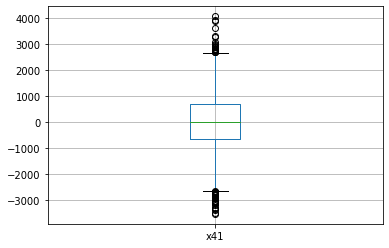

In [12]:
'''visualizing feature x41 seperately due to its extreme range as compared to other features'''
'''Outliers similar to rest of the features hence no special treatment needed'''
all_data.boxplot(column=["x41"])

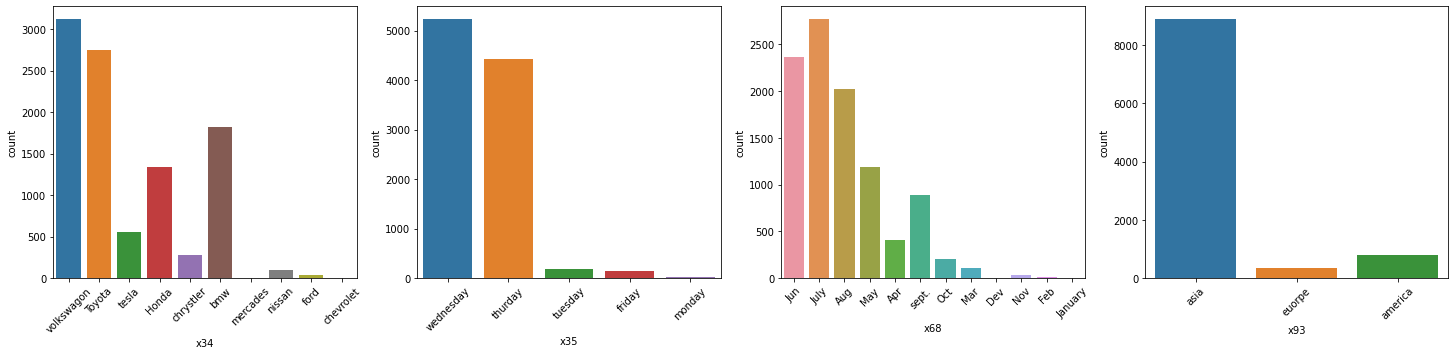

In [13]:
'''Visualizing Distribution of classes in categorical variables '''
'''x34 has very few representations of nissan and ford cars'''
'''x35 has very few representations of Mon , Tue, Friday '''
'''x93 has major category of asia while rest have very few values'''
fig, axs = plt.subplots(ncols=4)

i = 0
fig.set_size_inches(25, 5)
cols=all_data.select_dtypes(exclude=["float","int"]).columns
for v in axs:

            chart=sns.countplot(cols[i],data=all_data,ax=axs[i])
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
            
            i = i+1

In [15]:

cat_col=all_data.select_dtypes(exclude=["float","int"]).columns
for col in cat_col :
    print(col,'\n')
    print(all_data[col].value_counts(dropna=False),'\n')

x34 

volkswagon    3117
Toyota        2749
bmw           1822
Honda         1343
tesla          556
chrystler      277
nissan          93
ford            34
mercades         5
chevrolet        2
NaN              2
Name: x34, dtype: int64 

x35 

wednesday    5229
thurday      4427
tuesday       183
friday        140
monday         18
NaN             3
Name: x35, dtype: int64 

x68 

July       2767
Jun        2367
Aug        2020
May        1189
sept.       887
Apr         410
Oct         206
Mar         104
Nov          31
Feb           8
Dev           7
January       2
NaN           2
Name: x68, dtype: int64 

x93 

asia       8875
america     783
euorpe      341
NaN           1
Name: x93, dtype: int64 

